<a href="https://colab.research.google.com/github/FlavioSarto/FlavioSarto/blob/main/Trilha6_ClusteringFlavioS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Tarefa de Aprofundamento 5** 
## CASO: Clustering, Segmentando Países pela Força de Trabalho 
---
<br>
<br>





A partir deste notebook você vai criar modelos de clusterização para os países com base em suas características de força de trabalho. 

Em seguida, com base nos seus resultados, responda o **questionário do Moodle**. 

# Basic imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

# Exploração dos Dados



Esta base de dados contém a percentagem da população empregada em diferentes indústrias em 26 países europeus em 1979. 

- Country - o nome do país (identificador)
- Agr -% da força de trabalho empregada na agricultura
- Min -% na mineração
- Man -% na fabricação
- PS -% nas indústrias de fornecimento de energia
- Con - % em construção
- SI -% nas indústrias de serviços
- Fin -% em finanças
- SPS -% em serviços sociais e pessoais
- TC -% em transporte e comunicações

Fonte: https://statsandr.com/ 

**Objetivo:** Segmentar os países em grupos para aplicação de diferentes políticas públicas empregando Clusterização.

In [ ]:
#df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/Eurojobs.csv')
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/Eurojobs.csv', index_col=0)
df.head()

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
Country,,,,,,,,,
Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2
Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1
France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7
W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1
Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1


## Inspecione os dados

In [ ]:
# seu código
df.describe()

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,19.130769,1.253846,27.007692,0.907692,8.165385,12.957692,4.000000,20.023077,6.546154
std,15.546569,0.970044,7.007763,0.376216,1.645586,4.575253,2.806564,6.829542,1.391469
min,2.700000,0.100000,7.900000,0.100000,2.800000,5.200000,0.500000,5.300000,3.200000
25%,7.700000,0.525000,23.000000,0.600000,7.525000,9.250000,1.225000,16.250000,5.700000
50%,14.450000,0.950000,27.550000,0.850000,8.350000,14.400000,4.650000,19.650000,6.700000
75%,23.675000,1.800000,30.200000,1.175000,8.975000,16.875000,5.925000,24.125000,7.075000
max,66.800000,3.100000,41.200000,1.900000,11.500000,19.100000,11.300000,32.400000,9.400000


In [ ]:
df.isnull().sum()

Agr    0
Min    0
Man    0
PS     0
Con    0
SI     0
Fin    0
SPS    0
TC     0
dtype: int64

## Preparação dos dados

Normalize os dados o `StandardScaler` (melhor) ou a função `scale`.

$$ z_i = \frac{x_i - \bar{x}}{\sigma(x)}$$

E não esqueça de excluir dados não úteis ao treinamento. Depois de normalizar os dados os valores devem apresentar média próxima de 0 e desvio padrão próximo de 1.

In [ ]:
df.head()

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
Country,,,,,,,,,
Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2
Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1
France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7
W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1
Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1


In [ ]:
# seu código
scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

X[0:10]

array([[-1.03844649, -0.37199739,  0.08619551, -0.02085144,  0.02145187,
         1.3690936 ,  0.79940055,  0.9820822 ,  0.47920226],
       [-0.65142586, -1.21303495, -0.75784885, -0.83405766,  0.08342395,
         0.36606322,  0.90840971,  1.81828787,  0.40591251],
       [-0.54647111, -0.47712708,  0.07164302, -0.02085144,  0.4552564 ,
         0.85643363,  0.72672777,  0.38479244, -0.62014411],
       [-0.81541765,  0.0485214 ,  1.27949961, -0.02085144, -0.53629681,
         0.32148409,  0.36336389,  0.33999571, -0.32698507],
       [ 0.26692818, -0.26686769, -0.91792623,  1.06342351, -0.41235266,
         0.85643363, -0.43603666,  0.11601205, -0.32698507],
       [-0.21192785, -0.68738647,  0.08619551, -1.10512639,  1.13694923,
         1.14619796, -0.87207332,  0.01148634, -0.62014411],
       [-0.74982093,  1.94085592,  0.55187516, -0.29192018,  0.64117263,
         1.23535621,  0.21801833, -0.12290385, -0.25369532],
       [-0.84165634, -1.21303495, -0.65598143,  0.2502173 ,  1

## Número de Clusters

(Moodle) **Q1**. Qual o melhor número de clusters pela *regra do cotovelo* e pelo valor médio de silhueta aplicando o `kmedias`? (verifique de 2 a 10 clusters)

> Empregue `random_state= 1234` no `KMeans`. Não empregue outros parâmetros não solicitados.   



In [ ]:
def inercia(X=X, kmin=1, kmax=10):
    inertia = []
    for n in range(kmin , kmax+1):
        clf = KMeans(n_clusters = n , random_state= 1234)
        clf.fit(X)
        inertia.append(clf.inertia_)
    
    plt.figure(figsize = (8, 4))
    plt.plot(np.arange(2 , 11) , inertia , 'ko')
    plt.plot(np.arange(2 , 11) , inertia , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
    plt.title('Kmeans Inércia', fontsize=14, weight='bold')
    return inertia

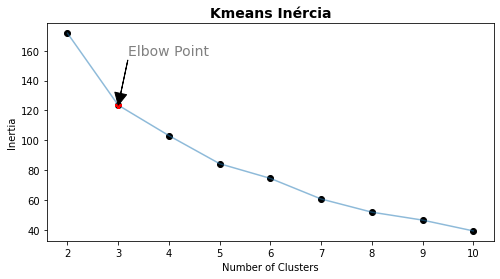

In [ ]:
# seu código
# Inércia está no eixo y e a quantidade de clusters no eixo x.
inertia = inercia(X,2,10)

plt.plot(3 , inertia[1] , 'P', alpha = 1, color = 'red')
plt.annotate('Elbow Point', (3 , inertia[1]), 
            xytext=(10, 50), fontsize=14,
            textcoords='offset points', 
            color='grey',arrowprops=dict(facecolor='black',width=0.1))

plt.show()     

In [ ]:
# seu código
for n_clusters in range(2,11):
    clf = KMeans(n_clusters = n_clusters , random_state= 1234)  
    clf.fit(X)
    labels = clf.labels_
    
    if(n_clusters < 10):
        print('Silhueta média para', n_clusters , ' clusters: ', 
        np.round( metrics.silhouette_score(X, labels, metric='euclidean'),3))
    else:
        print('Silhueta média para', n_clusters , 'clusters: ', 
        np.round( metrics.silhouette_score(X, labels, metric='euclidean'),3))

Silhueta média para 2  clusters:  0.323
Silhueta média para 3  clusters:  0.278
Silhueta média para 4  clusters:  0.231
Silhueta média para 5  clusters:  0.202
Silhueta média para 6  clusters:  0.164
Silhueta média para 7  clusters:  0.2
Silhueta média para 8  clusters:  0.194
Silhueta média para 9  clusters:  0.182
Silhueta média para 10 clusters:  0.181


(Moodle) **Q2**. Qual ao valor médio de silhueta para o melhor número de clusters na clusterização hierárquica (aglomerativa) para os esquemas de ligação (*linkage*) `ward` (padrão do `scikit-learn`),`complete` e `single`? (verifique de 2 a 10 clusters)

> Não empregue outros parâmetros não solicitados. 

In [ ]:
# seu código
# Esquema de ligação ward (padrão do scikit-learn)

for n in range(2,11):
    clf = AgglomerativeClustering(n_clusters=n)
    clf.fit(X)
    labels = clf.labels_
    
    if(n_clusters < 10):
        print('Silhueta média (ward) para', n , ' clusters: ', 
        np.round( metrics.silhouette_score(X, labels, metric='euclidean'),3))
    else:
        print('Silhueta média (ward) para', n , 'clusters: ', 
        np.round( metrics.silhouette_score(X, labels, metric='euclidean'),3))
        
    # Resultados
    print('\t',labels)

Silhueta média (ward) para 2  clusters:  0.456
	 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
Silhueta média (ward) para 3  clusters:  0.244
	 [2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 2 2 1 0 0 0 0 0 0 0 1]
Silhueta média (ward) para 4  clusters:  0.251
	 [2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 2 2 0 1 3 3 3 1 1 1 0]
Silhueta média (ward) para 5  clusters:  0.242
	 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 4 1 3 3 3 1 1 1 2]
Silhueta média (ward) para 6  clusters:  0.179
	 [1 1 1 2 1 2 2 1 1 1 1 0 1 0 0 1 2 4 0 3 3 3 0 0 0 5]
Silhueta média (ward) para 7  clusters:  0.187
	 [0 0 0 6 0 6 6 0 0 0 0 1 0 1 1 0 6 4 2 3 3 3 2 2 2 5]
Silhueta média (ward) para 8  clusters:  0.175
	 [1 1 1 6 7 6 6 1 7 7 7 0 1 0 0 1 6 4 2 3 3 3 2 2 2 5]
Silhueta média (ward) para 9  clusters:  0.18
	 [1 1 1 2 7 2 2 1 7 7 7 6 1 6 8 1 2 4 0 3 3 3 0 0 0 5]
Silhueta média (ward) para 10  clusters:  0.178
	 [1 1 1 0 7 0 0 1 7 7 7 6 1 6 8 1 0 9 2 3 3 3 2 2 4 5]


In [ ]:
# seu código
# Esquema de ligação single

for n in range(2,11):
    clf = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='single') 
    clf.fit(X)
    labels = clf.labels_

    if(n_clusters < 10):
        print('Silhueta média (single) para', n , ' clusters: ', 
        np.round( metrics.silhouette_score(X, labels, metric='euclidean'),3))
    else:
        print('Silhueta média (single) para', n , 'clusters: ', 
        np.round( metrics.silhouette_score(X, labels, metric='euclidean'),3))
        
    # Resultados
    print('\t',labels)

Silhueta média (single) para 2  clusters:  0.461
	 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Silhueta média (single) para 3  clusters:  0.388
	 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2]
Silhueta média (single) para 4  clusters:  0.134
	 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 1 0 0 0 0 0 0 0 2]
Silhueta média (single) para 5  clusters:  0.211
	 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 4 1 1 1 1 1 1 1 2]
Silhueta média (single) para 6  clusters:  0.128
	 [2 2 2 2 2 2 4 2 2 2 2 2 2 2 3 2 2 1 0 0 0 0 0 0 0 5]
Silhueta média (single) para 7  clusters:  0.101
	 [2 2 2 2 2 2 4 2 2 2 2 2 2 2 3 2 2 1 0 0 0 0 0 0 6 5]
Silhueta média (single) para 8  clusters:  0.086
	 [0 0 0 0 0 0 4 0 0 0 0 0 0 0 7 0 0 3 1 1 1 5 1 1 6 2]
Silhueta média (single) para 9  clusters:  0.126
	 [0 0 0 0 0 3 4 0 0 0 0 3 0 3 7 0 0 8 1 1 1 5 1 1 6 2]
Silhueta média (single) para 10  clusters:  0.056
	 [0 0 0 0 0 3 9 0 0 0 0 3 4 3 7 0 0 8 1 1 1 5 1 1 6 2]


In [ ]:
# seu código
# Esquema de ligação complete

for n in range(2,11):
    clf = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='complete') 
    clf.fit(X)
    labels = clf.labels_
    
    if(n_clusters < 10):
        print('Silhueta média (complete) para', n , ' clusters: ', 
        np.round( metrics.silhouette_score(X, labels, metric='euclidean'),3))
    else:
        print('Silhueta média (complete) para', n , 'clusters: ', 
        np.round( metrics.silhouette_score(X, labels, metric='euclidean'),3))
        
    # Resultados
    print('\t',labels)

Silhueta média (complete) para 2  clusters:  0.456
	 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
Silhueta média (complete) para 3  clusters:  0.227
	 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 2 2 0 0 0 1]
Silhueta média (complete) para 4  clusters:  0.206
	 [3 3 3 1 3 1 1 3 3 3 3 1 3 1 1 3 1 0 1 2 2 2 1 1 1 0]
Silhueta média (complete) para 5  clusters:  0.193
	 [1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 4 0 2 2 2 0 0 0 3]
Silhueta média (complete) para 6  clusters:  0.207
	 [1 1 1 0 1 0 0 1 1 1 1 2 1 2 0 1 0 4 2 5 5 5 2 2 2 3]
Silhueta média (complete) para 7  clusters:  0.187
	 [1 1 1 2 1 2 2 1 1 1 1 0 1 0 6 1 2 4 0 5 5 5 0 0 0 3]
Silhueta média (complete) para 8  clusters:  0.174
	 [0 0 0 2 0 2 2 0 0 0 0 1 0 1 6 0 2 4 1 5 5 5 1 1 7 3]
Silhueta média (complete) para 9  clusters:  0.161
	 [2 2 2 0 3 0 0 2 3 3 3 1 2 1 6 2 0 4 1 5 5 5 1 1 7 8]
Silhueta média (complete) para 10  clusters:  0.152
	 [2 2 2 1 3 1 9 2 3 3 3 0 2 0 6 2 1 4 0 5 5 5 0 0 7 8]


## Clusterização, 3 Clusters

O número de clusters não segue um único critério e normalmente é feita uma análise conjunta de várias métricas. Métodos não supervisionados são analíticos e é esperado que você analise as métricas e resultados para uma *solução*. 

(Moodle) **Q3**. Verifique a *distribuição* da quantidade de elementos no modelo que fornece o melhor número de silhueta. Qual é essa distribuição e responda se essa é uma clusterização útil e adequada.

> Note, por exemplo a distribuição de 100, 43, 8 para 3 grupos é uma distribuição melhor que 100, 50, 1 e podemos considerar neste último caso que o grupo com 1 elemento é um *outlier*.



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


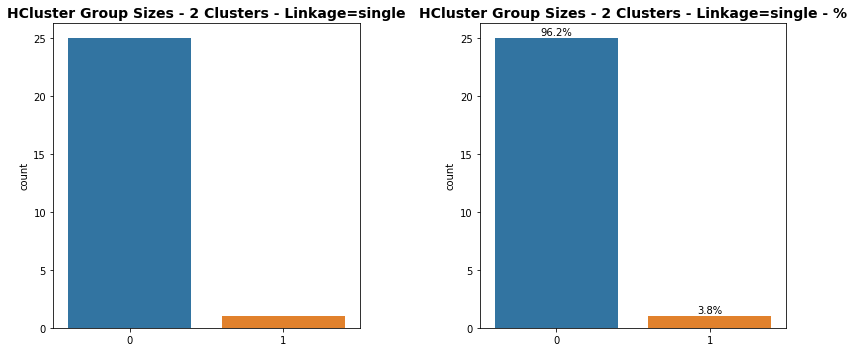

In [ ]:
# seu código

clf = AgglomerativeClustering(n_clusters=2, linkage='single') 
clf.fit(X)

# Resultados
labels = clf.labels_
print(labels)


f = plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
#plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.8)
#plt.title('Data', fontsize=14, weight='bold')
sns.countplot(x=labels)
plt.title('HCluster Group Sizes - 2 Clusters - Linkage=single', fontsize=14, weight='bold')

plt.subplot(1,2,2)
ax=sns.countplot(x=labels)
total = len(labels)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.title('HCluster Group Sizes - 2 Clusters - Linkage=single - %', fontsize=14, weight='bold')    

plt.tight_layout()
plt.show()


## Clusterização `Kmeans`,  $K=3$.

Vamos considerar que nossa análise ao final leva ao uso do Kmeans para 3 grupos de dados. De fato essa parece ser a melhor opção embora não tenhamos explorado isso aqui. Verique que a distribuição dos dados é de fato melhor e analise para esse modelo os valores médios dos grupos e os países pertencentes a cada grupo.

(Moodle) **Q4**. Há um grupo que se caracteriza por um % médio maior da força de trabalho empregada na agricultura. Qual esse percentual e que países fazem parte dele? 

(Moodle) **Q5**. Excetuando o grupo o com % médio maior da força de trabalho empregada na agricultura e esse indicador, o que mais se destaca em diferenciar os outros dois grupos?

> Empregue `random_state= 1234` no `KMeans`. Não empregue outros parâmetros não solicitados.



In [ ]:
# seu código

clf = KMeans(n_clusters = 3 , random_state= 1234)  
clf.fit(X)
labels = clf.labels_

# Resultados
labels = clf.labels_
print(labels)
df['Cluster'] = labels
df.head()

[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 2 2 2 2 2 2 2 0]


,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC,Cluster
Country,,,,,,,,,,
Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2,1
Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1,1
France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7,1
W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1,1
Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1,1


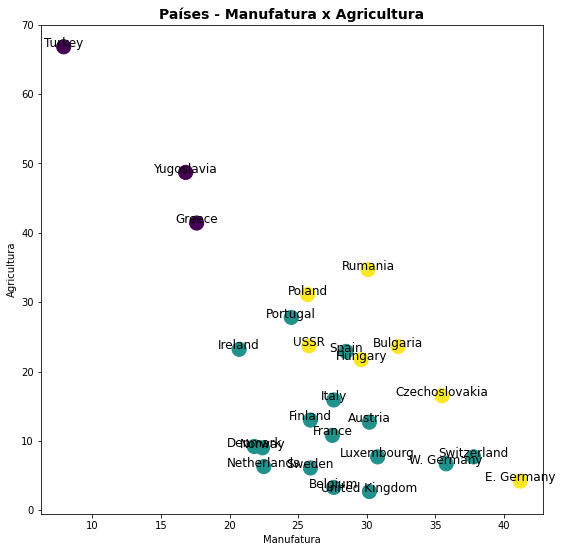

In [ ]:
f = plt.figure(figsize=(9,9))

plt.scatter(x = 'Man' ,y = 'Agr' , data = df , c = labels , s = 200 )

for line in range(0,df.shape[0]):
    plt.text(df.Man[line], df.Agr[line], df.index[line], 
             horizontalalignment='center', 
             size='large', 
             color='black')
  
plt.title('Países - Manufatura x Agricultura', fontsize=14, weight='bold')
plt.ylabel('Agricultura') , plt.xlabel('Manufatura')
plt.show()

26


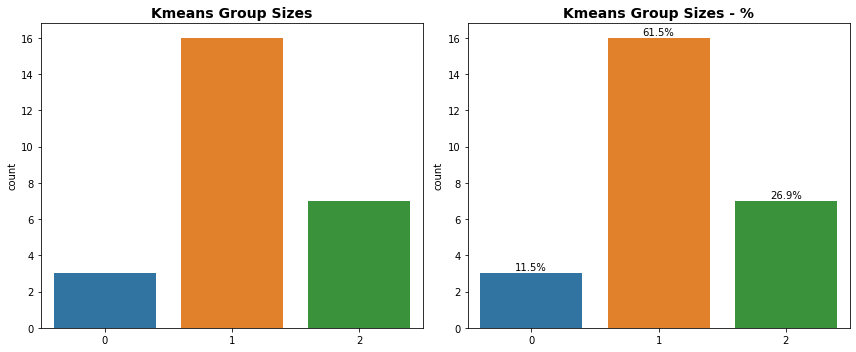

In [ ]:
print(len(labels))
f = plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
#plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.8)
#plt.title('Data', fontsize=14, weight='bold')
sns.countplot(x=labels)
plt.title('Kmeans Group Sizes', fontsize=14, weight='bold')

plt.subplot(1,2,2)
ax=sns.countplot(x=labels)
total = len(labels)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.title('Kmeans Group Sizes - %', fontsize=14, weight='bold')    

plt.tight_layout()
plt.show()


In [ ]:
df.groupby('Cluster').mean()

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
Cluster,,,,,,,,,
0,52.300000,0.933333,14.100000,0.600000,5.266667,7.700000,4.933333,9.400000,4.633333
1,11.562500,0.812500,27.481250,0.918750,8.612500,16.031250,5.175000,22.850000,6.562500
2,22.214286,2.400000,31.457143,1.014286,8.385714,8.185714,0.914286,18.114286,7.328571


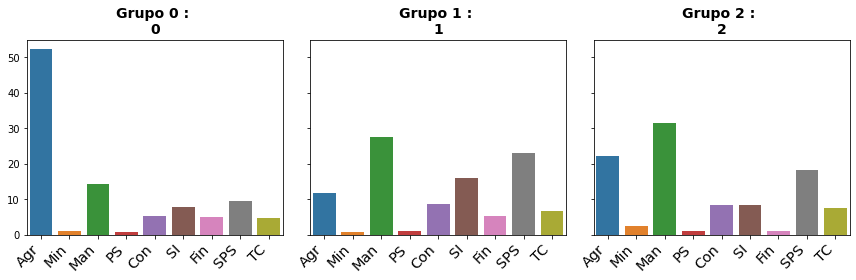

In [ ]:
eixoX = list(df.columns.values.tolist())
eixoX.remove('Cluster')

g = pd.DataFrame( df.groupby('Cluster').mean() ).reset_index()

fig, ax = plt.subplots(1,3,figsize=(12,4),sharey=True)

nomes = ['0','1','2']

for i in range(len(g)):
    sns.barplot(data=g[g.Cluster==i].drop(columns='Cluster'),ax=ax[i])
    ax[i].set_title('Grupo ' + str(i) + ' : \n' + nomes[i], fontsize=14, weight='bold')
    ax[i].set_xticklabels(eixoX, 
                          rotation=45,
                          horizontalalignment='right',
                          fontweight='light',
                          fontsize='x-large')
    
plt.tight_layout()
plt.show()

In [ ]:
df.loc[df['Cluster'] == 0]

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC,Cluster
Country,,,,,,,,,,
Greece,41.4,0.6,17.6,0.6,8.1,11.5,2.4,11.0,6.7,0
Turkey,66.8,0.7,7.9,0.1,2.8,5.2,1.1,11.9,3.2,0
Yugoslavia,48.7,1.5,16.8,1.1,4.9,6.4,11.3,5.3,4.0,0


In [ ]:
df.loc[df['Cluster'] == 1]

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC,Cluster
Country,,,,,,,,,,
Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2,1
Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1,1
France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7,1
W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1,1
Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1,1
Italy,15.9,0.6,27.6,0.5,10.0,18.1,1.6,20.1,5.7,1
Luxembourg,7.7,3.1,30.8,0.8,9.2,18.5,4.6,19.2,6.2,1
Netherlands,6.3,0.1,22.5,1.0,9.9,18.0,6.8,28.5,6.8,1
United Kingdom,2.7,1.4,30.2,1.4,6.9,16.9,5.7,28.3,6.4,1


In [ ]:
df.loc[df['Cluster'] == 2]

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC,Cluster
Country,,,,,,,,,,
Bulgaria,23.6,1.9,32.3,0.6,7.9,8.0,0.7,18.2,6.7,2
Czechoslovakia,16.5,2.9,35.5,1.2,8.7,9.2,0.9,17.9,7.0,2
E. Germany,4.2,2.9,41.2,1.3,7.6,11.2,1.2,22.1,8.4,2
Hungary,21.7,3.1,29.6,1.9,8.2,9.4,0.9,17.2,8.0,2
Poland,31.1,2.5,25.7,0.9,8.4,7.5,0.9,16.1,6.9,2
Rumania,34.7,2.1,30.1,0.6,8.7,5.9,1.3,11.7,5.0,2
USSR,23.7,1.4,25.8,0.6,9.2,6.1,0.5,23.6,9.3,2
